In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
df = pd.read_csv("C:/Users/harsh/Downloads/ML1/day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# Checking for null values if any and data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No Null values are present.

#### Mapping categorical columns with their values

yr, workingday, holiday, season, mnth, weekday, weathersit are categorical variables.

In [6]:
season = ['spring', 'summer', 'fall', 'winter']
yr = ['2018','2019']
mnth = ['January', 'Februrary','March','April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
weathersit = ['Clear-Partly cloudy', ' Mist-Cloudy', 'Light Snow-Light Rain-Thunderstorm', 'Heavy Rain-Ice Pallets']
holiday = ['holiday_no', 'hoilday_yes']
workingday = ['workingday_no', 'workingday_yes']

df["season"] = df["season"].apply(lambda x: season[x-1])
df["yr"] = df["yr"].apply(lambda x: yr[x])
df["mnth"] = df["mnth"].apply(lambda x: mnth[x-1])
df["weekday"] = df["weekday"].apply(lambda x: weekday[x])
df["weathersit"] = df["weathersit"].apply(lambda x: weathersit[x-1])
df["holiday"] = df["holiday"].apply(lambda x: holiday[x])
df["workingday"] = df["workingday"].apply(lambda x: workingday[x])


In [7]:
df.describe(percentiles = [0.25, 0.5, 0.75, 0.90, 0.99])

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
90%,657.100000,29.998347,33.908210,81.762500,19.833997,1872.000000,5895.400000,7293.800000
99%,722.710000,33.868050,38.941650,92.795857,27.380948,2931.680000,6787.390000,8163.810000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Data steadly increasing, No outliers present.

### Visualisations

<AxesSubplot:xlabel='cnt', ylabel='Density'>

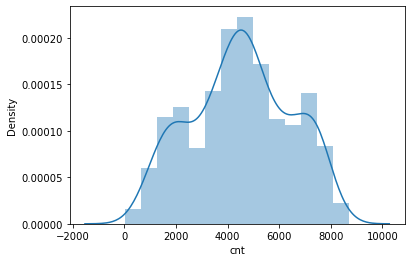

In [8]:
sns.distplot(df['cnt'])

Insights:
1. Bell shaped graph with centered around 4500

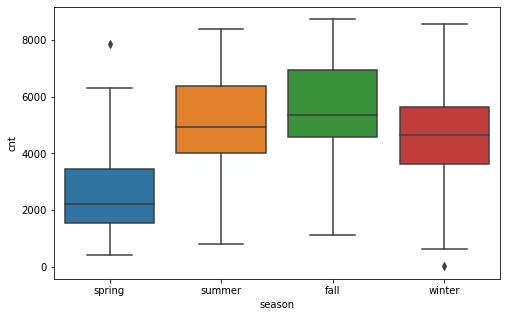

In [9]:
fig = plt.figure(figsize = (8, 5))
sns.boxplot(df['season'], df['cnt'])
fig.show()

Insights:
1. Max count in Fall season

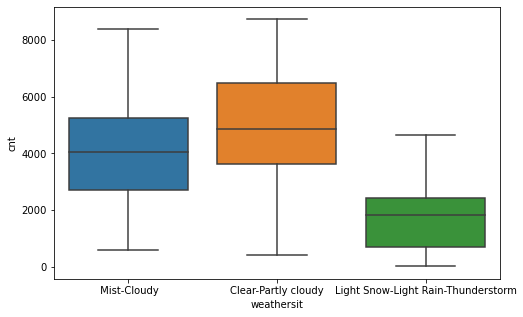

In [10]:
fig = plt.figure(figsize = (8, 5))
sns.boxplot(df['weathersit'], df['cnt'])
fig.show()

Insights:
1. Count is max in weather situation 1 (Clear, Few clouds, Partly cloudy, Partly cloudy)
2. Count is min in weather situation 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

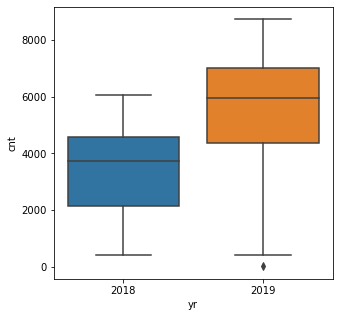

In [11]:
fig = plt.figure(figsize = (5, 5))
sns.boxplot(df['yr'], df['cnt'])
fig.show()

Insights:
1. Significant increase in number of counts in 2019 from 2018.

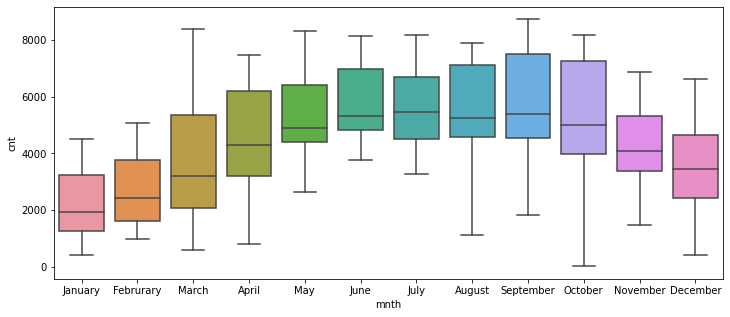

In [12]:
fig = plt.figure(figsize = (12, 5))
sns.boxplot(df['mnth'], df['cnt'])
fig.show()

Insights:
1. Counts in middle of the year is higher than in the beginning and the end of the year.

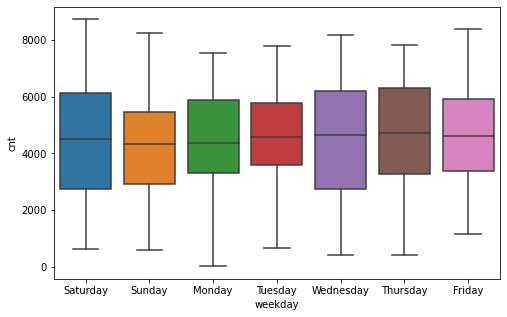

In [13]:
fig = plt.figure(figsize = (8, 5))
sns.boxplot(df['weekday'], df['cnt'])
fig.show()

Insights:
1. Median of the Count fairly lie in similar range across week.

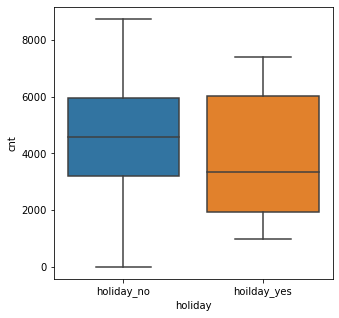

In [14]:
fig = plt.figure(figsize = (5, 5))
sns.boxplot(df['holiday'], df['cnt'])
fig.show()

Insights:
1. Count of total rental bikes is lower on holidays.

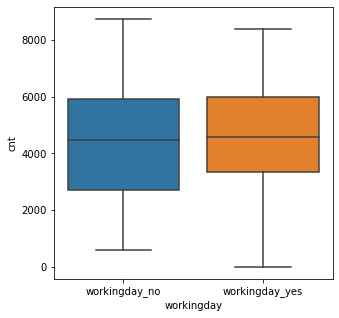

In [15]:
fig = plt.figure(figsize = (5, 5))
sns.boxplot(df['workingday'], df['cnt'])
fig.show()

Insights:
1. Count of total rental bikes is higher on working days.

<Figure size 1080x2160 with 0 Axes>

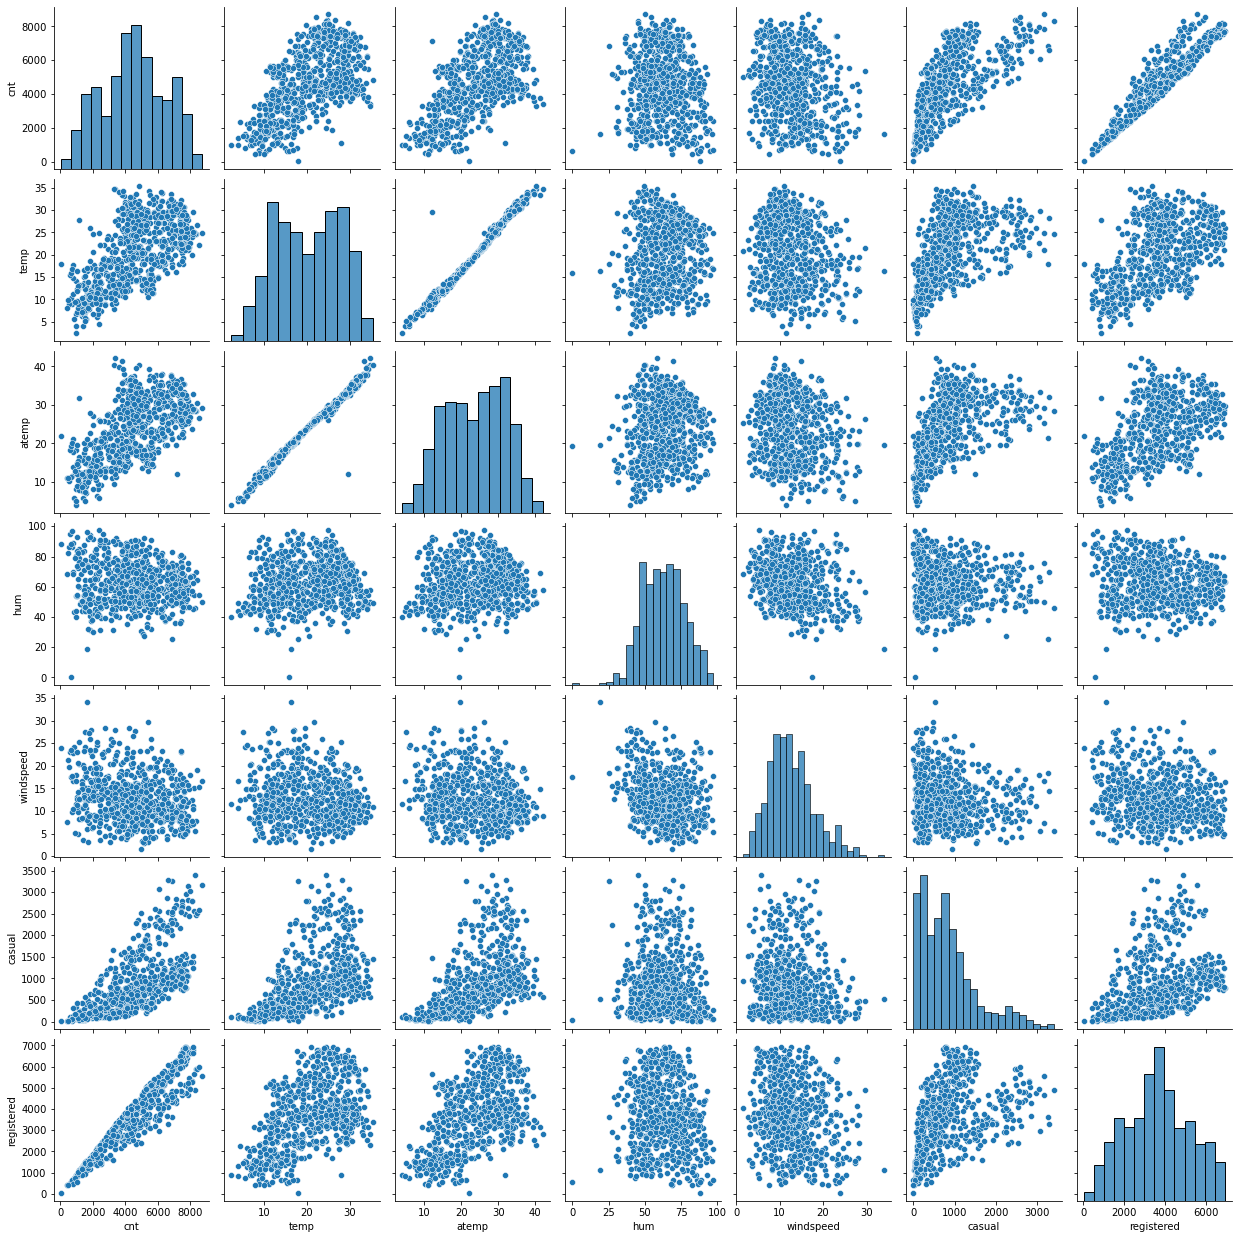

In [16]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=df ,vars=['cnt', 'temp', 'atemp', 'hum','windspeed', 'casual', 'registered'])
plt.show()

Temp and aTemp have linear relation
count and Temp also has some linear relationship.

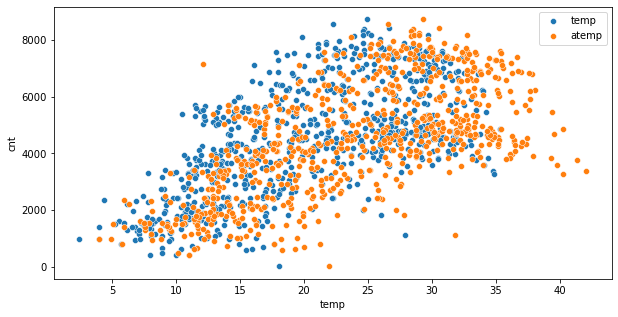

In [17]:
fig = plt.figure(figsize = (10, 5))
sns.scatterplot(df['temp'], df['cnt'])
sns.scatterplot(df['atemp'], df['cnt'])
plt.legend(['temp', 'atemp'])
plt.show()

Insights:
1. Actual temperature and feeling temperature are scattered in similar way.
2. Linear relation can be seen between temperature and counts.

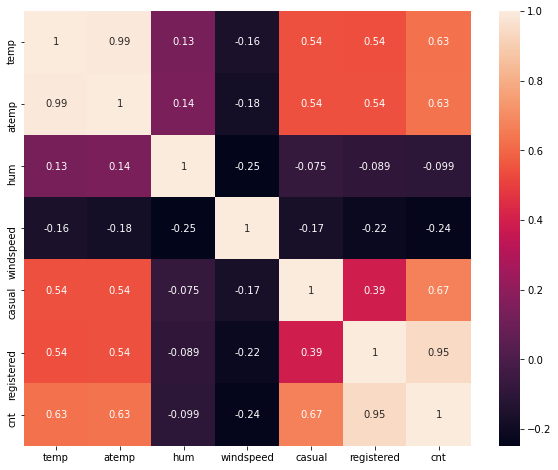

In [18]:
# Plotting heatmap for numerical columns
fig = plt.figure(figsize = (10, 8))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr(), annot = True)
fig.show()

Insights:
1. Temp and atemp are highly correlated (99%). Can remove atemp col but will check while stats analysis.
2. registered and cnt are also highly correlated (95%).
3. Temp, aTemp also correlated to count equally.
4. Humidity and Windspeed is negatively correlated to count.

### Data Preparation

In [19]:
# Dropping instant columns since it is index column, and dteday since we already have day, month and year 
df = df.drop(['instant','dteday'] ,axis =1)

In [20]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,January,holiday_no,Saturday,workingday_no,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,January,holiday_no,Sunday,workingday_no,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,January,holiday_no,Monday,workingday_yes,Clear-Partly cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,January,holiday_no,Tuesday,workingday_yes,Clear-Partly cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,January,holiday_no,Wednesday,workingday_yes,Clear-Partly cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
# Dropping casual and registered columns since total counts is sum of casual and registered, these columns are not the predictors 
df = df.drop(['casual', 'registered'],axis =1)

In [22]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,January,holiday_no,Saturday,workingday_no,Mist-Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,January,holiday_no,Sunday,workingday_no,Mist-Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,January,holiday_no,Monday,workingday_yes,Clear-Partly cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,January,holiday_no,Tuesday,workingday_yes,Clear-Partly cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,January,holiday_no,Wednesday,workingday_yes,Clear-Partly cloudy,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables
Converting Categorical columns to dummy columns.
Season has 4 levels,yr has 2 levels, mnth has 12 levels, holiday has 2 levels, weekday has 7 levels, workingday has 2 levels and weathersit has 4 levels

In [23]:
# Get the dummy variables for the above features and removing first dummy column for each of the above column to avoid redundancy.
dummies = ['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']
dataf = pd.get_dummies(df, columns = dummies, drop_first = True)

In [24]:
dataf.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear-Partly cloudy,weathersit_Light Snow-Light Rain-Thunderstorm,yr_2019,holiday_holiday_no,workingday_workingday_yes
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1


In [25]:
# Checking the columns
dataf.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_August', 'mnth_December',
       'mnth_Februrary', 'mnth_January', 'mnth_July', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Clear-Partly cloudy',
       'weathersit_Light Snow-Light Rain-Thunderstorm', 'yr_2019',
       'holiday_holiday_no', 'workingday_workingday_yes'],
      dtype='object')

### Splitting the Data into Training and Testing Sets


In [26]:
from sklearn.model_selection import train_test_split

# Spliting data into training and testing datasets.
df_train, df_test = train_test_split(dataf, train_size = 0.70, random_state = 100)


In [27]:
print(df_train.shape)
print(df_test.shape)
print(dataf.shape)

(510, 30)
(220, 30)
(730, 30)


### Rescaling the Numeric Features
Using MinMax Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [29]:
# Apply scaler() to all the numerical columns on training data
num_vars = ['temp', 'hum', 'windspeed', 'atemp']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear-Partly cloudy,weathersit_Light Snow-Light Rain-Thunderstorm,yr_2019,holiday_holiday_no,workingday_workingday_yes
576,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,1
426,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
728,0.245101,0.200348,0.498067,0.663106,1796,1,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0
482,0.395666,0.391735,0.504508,0.188475,4220,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
111,0.345824,0.318819,0.751824,0.380981,1683,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


### Dividing into X and Y sets for the model building


In [30]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building the model


Assumptions:
1. Linear relationship between X and Y
2. Error terms are normally distributed (not X, Y)
3. Error terms are independent of each other
4. Error terms have constant variance (homoscedasticity

In [31]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [32]:
# Fitting Linear Regression object on training data
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running and fitting RFE on training data with the output number of the variable equal to 21. (Top 70% of the columns)
rfe = RFE(lm, 21)
rfe = rfe.fit(X_train, y_train)

In [33]:
# significant columns as per RFE.
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 2),
 ('mnth_December', True, 1),
 ('mnth_Februrary', True, 1),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 7),
 ('mnth_March', False, 9),
 ('mnth_May', True, 1),
 ('mnth_November', True, 1),
 ('mnth_October', False, 6),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 3),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 5),
 ('weekday_Tuesday', False, 4),
 ('weekday_Wednesday', False, 8),
 ('weathersit_Clear-Partly cloudy', True, 1),
 ('weathersit_Light Snow-Light Rain-Thunderstorm', True, 1),
 ('yr_2019', True, 1),
 ('holiday_holiday_no', True, 1),
 ('workingday_workingday_yes', True, 1)]

In [34]:
# Top 21 significant predictors
col = X_train.columns[rfe.support_]
col

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_December', 'mnth_Februrary', 'mnth_January',
       'mnth_July', 'mnth_May', 'mnth_November', 'mnth_September',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Clear-Partly cloudy',
       'weathersit_Light Snow-Light Rain-Thunderstorm', 'yr_2019',
       'holiday_holiday_no', 'workingday_workingday_yes'],
      dtype='object')

In [35]:
# Less significant columns are not considered
X_train.columns[~rfe.support_]

Index(['mnth_August', 'mnth_June', 'mnth_March', 'mnth_October',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [36]:
X_train_rfe = X_train[col]

Using StatsModel api for model building stats analysis

In [37]:
# Adding a constant column since sm does not provide with constant col
X_train_rfe = sm.add_constant(X_train_rfe)

# Running and fitting the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [38]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.3
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          6.28e-188
Time:                        20:27:30   Log-Likelihood:                -4100.4
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     489   BIC:                             8332.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Insights:
1. Columns atemp, season_summer, mnth_Februrary, mnth_May, weekday_Sunday have P values greater than 5%. 
2. Highest P value of the variable atemp.
3. R squared = 85.2%
4. Adjusted R squared = 84.6%
5. P(F stats) close to 0 (significant fit of the model)

In [39]:
# Calculate the VIFs for the model for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_VIF(data):
    vif = pd.DataFrame()
    X = data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

calc_VIF(X_train_rfe) 

                                         Features     VIF
21                      workingday_workingday_yes     inf
15                               weekday_Saturday     inf
20                             holiday_holiday_no     inf
16                                 weekday_Sunday     inf
0                                           const  151.87
1                                            temp   59.59
2                                           atemp   53.94
5                                   season_spring    5.90
7                                   season_winter    4.02
6                                   season_summer    3.62
10                                   mnth_January    2.38
3                                             hum    1.97
9                                  mnth_Februrary    1.87
13                                  mnth_November    1.82
8                                   mnth_December    1.66
17                 weathersit_Clear-Partly cloudy    1.64
12            

In [40]:
# Dropping atemp since it has highest P value and also high VIF.
X_train_imp = X_train_rfe.drop('atemp', axis = 1)

In [41]:
# Performing backward Selection for reducing insignificant variables
X_train_imp = sm.add_constant(X_train_imp)
lm = sm.OLS(y_train,X_train_imp).fit() 

In [42]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          5.20e-189
Time:                        20:27:30   Log-Likelihood:                -4100.4
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     490   BIC:                             8325.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Insights:
1. Columns season_summer, mnth_Februrary, mnth_May, weekday_Sunday have P values greater than 5%. 
2. Highest P value of the variable weekday_Sunday.
3. R squared = 85.2%
4. Adjusted R squared = 84.7%

In [43]:
# Calculate the VIFs for the new model
calc_VIF(X_train_imp)

                                         Features     VIF
20                      workingday_workingday_yes     inf
14                               weekday_Saturday     inf
19                             holiday_holiday_no     inf
15                                 weekday_Sunday     inf
0                                           const  151.40
4                                   season_spring    5.79
1                                            temp    4.88
6                                   season_winter    3.88
5                                   season_summer    3.49
9                                    mnth_January    2.38
2                                             hum    1.97
8                                  mnth_Februrary    1.87
12                                  mnth_November    1.82
7                                   mnth_December    1.66
16                 weathersit_Clear-Partly cloudy    1.64
11                                       mnth_May    1.51
10            

Insights:
1. workingday_workingday_yes, weekday_Saturday, holiday_holiday_no, weekday_Sunday having inf VIF. This means there is a perfect correlation between them.

In [44]:
# Since workingSunday is having highest P value and also inf VIF, dropping this column
X_train_imp = X_train_imp.drop('weekday_Sunday', axis = 1)

In [45]:
# Performing backward Selection for reducing insignificant variables
X_train_imp = sm.add_constant(X_train_imp)
lm = sm.OLS(y_train,X_train_imp).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          5.20e-189
Time:                        20:27:30   Log-Likelihood:                -4100.4
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     490   BIC:                             8325.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Insights:
1. Columns season_summer, mnth_Februrary, mnth_May and new variable holiday_holiday_no have P values greater than 5%. 
2. Highest P value of the variable weekday_Sunday.
3. R squared = 85.2%
4. Adjusted R squared = 84.7%

In [46]:
# Calculate the VIFs for the new model
calc_VIF(X_train_imp)

                                         Features     VIF
0                                           const  151.40
4                                   season_spring    5.79
1                                            temp    4.88
6                                   season_winter    3.88
5                                   season_summer    3.49
9                                    mnth_January    2.38
2                                             hum    1.97
19                      workingday_workingday_yes    1.88
8                                  mnth_Februrary    1.87
12                                  mnth_November    1.82
14                               weekday_Saturday    1.79
7                                   mnth_December    1.66
15                 weathersit_Clear-Partly cloudy    1.64
11                                       mnth_May    1.51
10                                      mnth_July    1.49
13                                 mnth_September    1.34
3             

Insights:
1. VIF values came down significantly. season_spring col has VIF a little greater than 5.

In [47]:
# Dropping col mnth_May since it has P value > 5%    
X_train_imp = X_train_imp.drop('mnth_May', axis = 1)

In [48]:
# Performing backward Selection for reducing insignificant variables
X_train_imp = sm.add_constant(X_train_imp)
lm = sm.OLS(y_train,X_train_imp).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          9.80e-190
Time:                        20:27:31   Log-Likelihood:                -4101.3
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     491   BIC:                             8321.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Insights:
1. Columns season_summer, mnth_Februrary and holiday_holiday_no have P values greater than 5%. 
2. Highest P value of the variable mnth_February.
3. R squared = 85.2%, no dropping from previous model
4. Adjusted R squared = 84.6%

In [49]:
# Dropping mnth_Februrary now, since its P value above 11%.        
X_train_imp = X_train_imp.drop('mnth_Februrary', axis = 1)

In [50]:
# Performing backward Selection for reducing insignificant variables
X_train_imp = sm.add_constant(X_train_imp)
lm = sm.OLS(y_train,X_train_imp).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          2.52e-190
Time:                        20:27:31   Log-Likelihood:                -4102.6
No. Observations:                 510   AIC:                             8241.
Df Residuals:                     492   BIC:                             8317.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Insights:
1. Columns holiday_holiday_no have P values a little grater than 5%. 
2. P value of season_summer has reduced.
3. R squared = 85.1%
4. Adjusted R squared = 84.6%

In [51]:
# Dropping holiday_holiday_no which is having P value > 5%.
X_train_imp = X_train_imp.drop('holiday_holiday_no', axis = 1)

In [52]:
# Performing backward Selection for reducing insignificant variables
X_train_imp = sm.add_constant(X_train_imp)
lm = sm.OLS(y_train,X_train_imp).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sun, 12 Dec 2021   Prob (F-statistic):          1.20e-190
Time:                        20:27:31   Log-Likelihood:                -4104.5
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     493   BIC:                             8315.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Insights:
1. No columns now have P values greater than 5%. 
3. R squared = 85.0%
4. Adjusted R squared = 84.5%

In [53]:
# Calculate the VIFs for the new model
calc_VIF(X_train_imp)

                                         Features     VIF
0                                           const  105.57
4                                   season_spring    5.26
1                                            temp    4.42
6                                   season_winter    3.83
5                                   season_summer    2.77
2                                             hum    1.94
10                                  mnth_November    1.75
8                                    mnth_January    1.68
16                      workingday_workingday_yes    1.66
12                               weekday_Saturday    1.65
13                 weathersit_Clear-Partly cloudy    1.64
7                                   mnth_December    1.50
9                                       mnth_July    1.49
11                                 mnth_September    1.33
3                                       windspeed    1.22
14  weathersit_Light Snow-Light Rain-Thunderstorm    1.13
15            

Since Season_spring is a significant variable despite having VIF greater than 5, we will retain it. 

In [54]:
# These variables are significant in predicting the demand for shared bikes.
X_train_imp.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_December', 'mnth_January', 'mnth_July',
       'mnth_November', 'mnth_September', 'weekday_Saturday',
       'weathersit_Clear-Partly cloudy',
       'weathersit_Light Snow-Light Rain-Thunderstorm', 'yr_2019',
       'workingday_workingday_yes'],
      dtype='object')

Top 3 variables describing the bike demands (checked from coef)
1. Temp 
2. weathersit_Weather_3
3. yr_2019

##### Model is now final. Above predictors are able to explain 85% of the variance. 

### Predictions and Residual Analysis

Checking if the error terms are also normally distributed (one of the major assumptions of linear regression), plotting the histogram of the error terms.

In [55]:
# Predictions on training data
y_train_pred = lm.predict(X_train_imp)

In [56]:
residuals = y_train - y_train_pred

##### Plotting distplot for residuals

<AxesSubplot:ylabel='Density'>

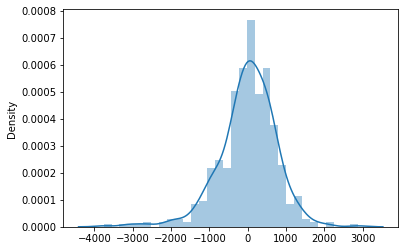

In [57]:
sns.distplot(residuals)

Plot is Bell shaped(normally distributed) with zero centered.

##### Predictions

In [58]:
df_test.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear-Partly cloudy,weathersit_Light Snow-Light Rain-Thunderstorm,yr_2019,holiday_holiday_no,workingday_workingday_yes
184,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,...,0,0,0,0,1,1,0,1,1,1
299,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
221,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,1
152,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1


#### Applying the scaling on the test sets

In [59]:
# Transforming the numerical variables using same scaler fitted on training data
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [60]:
#  Scaled data
df_test.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,mnth_December,...,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear-Partly cloudy,weathersit_Light Snow-Light Rain-Thunderstorm,yr_2019,holiday_holiday_no,workingday_workingday_yes
184,0.831783,0.769660,0.657364,0.084219,6043,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535,0.901354,0.842587,0.610133,0.153728,6211,0,1,0,0,0,...,0,0,0,0,1,1,0,1,1,1
299,0.511964,0.496145,0.837699,0.334206,2659,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
221,0.881625,0.795343,0.437098,0.339570,4780,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,1
152,0.817246,0.741471,0.314298,0.537414,4968,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,1


#### Dividing test data into X and Y sets


In [61]:
y_test = df_test.pop('cnt')
X_test = df_test

#### Extracting only those columns which were used to build ore final model from test data

In [62]:
X_train_imp.head()

,const,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weekday_Saturday,weathersit_Clear-Partly cloudy,weathersit_Light Snow-Light Rain-Thunderstorm,yr_2019,workingday_workingday_yes
576,1.0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,1,0,1,1
426,1.0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0,0,1,0
728,1.0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,1,0,1,0
482,1.0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0,0,1,0
111,1.0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,1


In [63]:
# Excluding constant variable for now
X_test_imp = X_test[X_train_imp.columns[1:]]

In [64]:
# Adding a constant variable column 
X_test_imp = sm.add_constant(X_test_imp)

In [65]:
# Predicting
y_test_pred = lm.predict(X_test_imp)

### Evaluations

In [66]:
from sklearn.metrics import r2_score

In [67]:
print("r2 score for train set = ", r2_score(y_train, y_train_pred))

r2 score for train set =  0.8491899138694096


In [68]:
print("r2 score for test set = ", r2_score(y_test, y_test_pred))

r2 score for test set =  0.8249755910367456


In [69]:
# Coeff for best fit line
round(lm.params,4)

const                                            1855.5469
temp                                             4123.6372
hum                                             -1286.0885
windspeed                                       -1636.5103
season_spring                                    -541.9959
season_summer                                     366.1029
season_winter                                     902.3271
mnth_December                                    -346.2562
mnth_January                                     -404.0113
mnth_July                                        -446.9141
mnth_November                                    -383.3660
mnth_September                                    620.3923
weekday_Saturday                                  543.5626
weathersit_Clear-Partly cloudy                    504.9655
weathersit_Light Snow-Light Rain-Thunderstorm   -1713.2689
yr_2019                                          2008.7006
workingday_workingday_yes                         452.56

### Best Fit Line

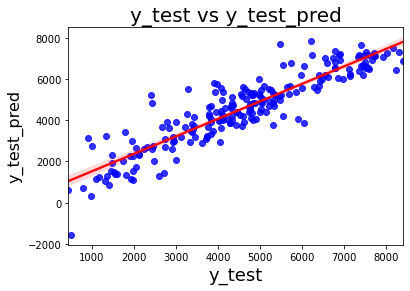

In [70]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()